📏 Top 5 Nearest Neighbors:

    sepal_length  sepal_width  petal_length  petal_width species  Distance
7            5.0          3.4           1.5          0.2  setosa  0.100000
0            5.1          3.5           1.4          0.2  setosa  0.141421
39           5.1          3.4           1.5          0.2  setosa  0.141421
4            5.0          3.6           1.4          0.2  setosa  0.141421
17           5.1          3.5           1.4          0.3  setosa  0.173205

🔮 Predicted Class for New Sample ➝ setosa


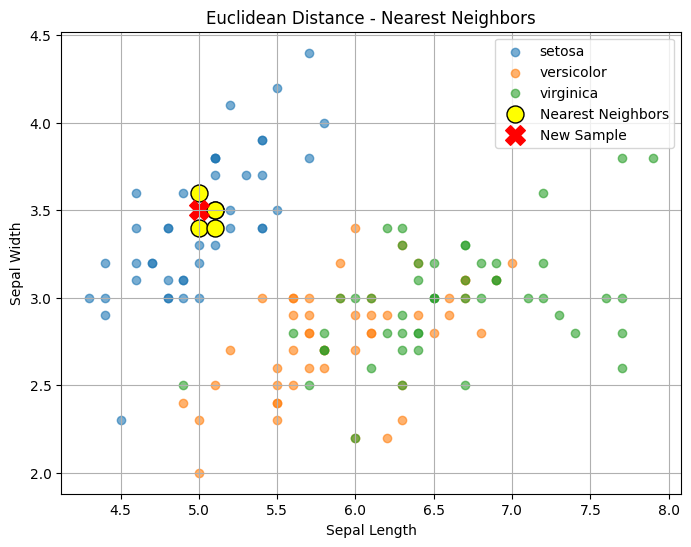

In [9]:
# 🧮 Problem 2: Euclidean Distance & Nearest Neighbors with Visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1️⃣ Load Iris Dataset from Online
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
data = pd.read_csv(url)

# 2️⃣ Select Features & Target
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = data['species']

# 3️⃣ New Sample
new_flower = np.array([5.0, 3.5, 1.5, 0.2])

# 4️⃣ Calculate Euclidean Distance
data['Distance'] = np.sqrt(((X - new_flower) ** 2).sum(axis=1))

# 5️⃣ Sort by Distance & Get Nearest Neighbors
nearest = data.sort_values(by='Distance').head(5)

print("📏 Top 5 Nearest Neighbors:\n")
print(nearest[['sepal_length','sepal_width','petal_length','petal_width','species','Distance']])

# 6️⃣ Majority Vote Prediction (k=3)
top_k = nearest.head(3)
predicted_class = top_k['species'].mode()[0]
print(f"\n🔮 Predicted Class for New Sample ➝ {predicted_class}")

# 7️⃣ Visualization - Scatter Plot with Neighbors Highlighted
plt.figure(figsize=(8,6))

# Plot each class
for species in data['species'].unique():
    species_data = data[data['species'] == species]
    plt.scatter(species_data['sepal_length'], species_data['sepal_width'], label=species, alpha=0.6)

# Highlight nearest neighbors
plt.scatter(nearest['sepal_length'], nearest['sepal_width'],
            edgecolor='black', facecolor='yellow', s=150, marker='o', label='Nearest Neighbors')

# Plot new sample
plt.scatter(new_flower[0], new_flower[1], color='red', marker='X', s=200, label='New Sample')

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Euclidean Distance - Nearest Neighbors")
plt.legend()
plt.grid()
plt.show()
